In [ ]:
import serial # type: ignore
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Stopped.


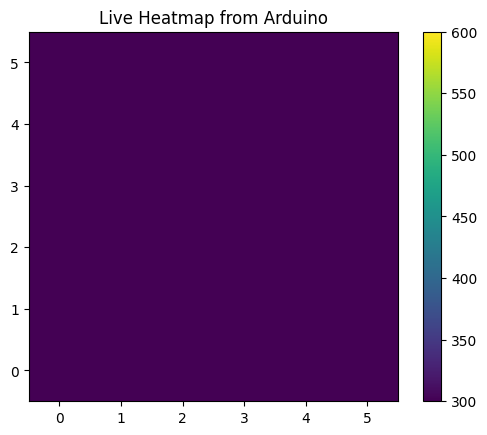

In [ ]:
# Connect to Arduino (adjust port if needed)
arduino = serial.Serial('/dev/cu.usbmodem101', 115200, timeout=1)
print("Connected.")
time.sleep(2)
arduino.reset_input_buffer()

# Grid setup
grid = np.zeros((6, 6), dtype=int)

# Plot setup
fig, ax = plt.subplots()
heatmap = ax.imshow(grid, cmap='viridis', origin='lower', vmin=0, vmax=600)
plt.colorbar(heatmap, ax=ax)
ax.set_title("Live Heatmap from Arduino")
plt.xticks(range(6))
plt.yticks(range(6))
fig.canvas.draw_idle()
fig.canvas.flush_events()
display(fig)

# Main loop
while True:
    try:
        line = arduino.readline().decode('utf-8', errors='ignore').strip()
        if line and ',' in line and '=' in line:
            try:
                coord_part, val_part = line.split('=')
                x_str, y_str = coord_part.split(',')    
                x = int(x_str)
                y = int(y_str)
                value = int(val_part)

                if 0 <= x < 6 and 0 <= y < 6:
                    grid[y, x] = value

                # Display update after every line
                heatmap.set_data(grid)
                clear_output(wait=True)
                display(fig)

            except Exception as e:
                print(f"Parse error: {line} | {e}")
    except KeyboardInterrupt:
        print("Stopped.")
        break